### Метод главных компонент PCA

In [1]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn import manifold
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import datasets

In [2]:
iris = datasets.load_iris()
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [3]:
X = iris.data
y = iris.target

In [4]:
# Метод PCA
pca = decomposition.PCA()
pca.fit(X)

PCA()

In [5]:
# Вычисляем дисперсию
explained_variance = pca.explained_variance_
print(explained_variance)

[4.22824171 0.24267075 0.0782095  0.02383509]


In [6]:
# Второй спостоб
q = np.zeros(4)
for i in range(4):
    q[i] = explained_variance[i]/np.sum(explained_variance)
    
print(q)

[0.92461872 0.05306648 0.01710261 0.00521218]


In [7]:
explained_variance_ratio = pca.explained_variance_ratio_
print(explained_variance_ratio)

[0.92461872 0.05306648 0.01710261 0.00521218]


In [8]:
# Сингулярные собственные значения
print(pca.singular_values_)

[25.09996044  6.01314738  3.41368064  1.88452351]


In [9]:
# Проверка
X = np.transpose(X)
# Ковариационная матрица
covmat = np.cov(X)
print(covmat)

[[ 0.68569351 -0.042434    1.27431544  0.51627069]
 [-0.042434    0.18997942 -0.32965638 -0.12163937]
 [ 1.27431544 -0.32965638  3.11627785  1.2956094 ]
 [ 0.51627069 -0.12163937  1.2956094   0.58100626]]


In [10]:
# Находим собственные значения
# и собственные векторы ковариацонной матрицы
A = np.linalg.eig(covmat)
print(A)

(array([4.22824171, 0.24267075, 0.0782095 , 0.02383509]), array([[ 0.36138659, -0.65658877, -0.58202985,  0.31548719],
       [-0.08452251, -0.73016143,  0.59791083, -0.3197231 ],
       [ 0.85667061,  0.17337266,  0.07623608, -0.47983899],
       [ 0.3582892 ,  0.07548102,  0.54583143,  0.75365743]]))


In [11]:
# Собственные вектора
eig_vect = A[1]
print(eig_vect)

[[ 0.36138659 -0.65658877 -0.58202985  0.31548719]
 [-0.08452251 -0.73016143  0.59791083 -0.3197231 ]
 [ 0.85667061  0.17337266  0.07623608 -0.47983899]
 [ 0.3582892   0.07548102  0.54583143  0.75365743]]


In [12]:
# Выбираем первую и вторую главные компоненты
main_comp = np.transpose(eig_vect[:,0:2])
print(main_comp)

[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [-0.65658877 -0.73016143  0.17337266  0.07548102]]


In [13]:
# Массив новых данных для кластеризации
X_new = np.dot(main_comp, X)
X_new = np.transpose(X_new)
print(X_new)

[[ 2.81823951 -5.64634982]
 [ 2.78822345 -5.14995135]
 [ 2.61337456 -5.18200315]
 [ 2.75702228 -5.0086536 ]
 [ 2.7736486  -5.65370709]
 [ 3.2215055  -6.06828303]
 [ 2.68182738 -5.23749119]
 [ 2.87622016 -5.49033754]
 [ 2.6159824  -4.74864082]
 [ 2.82960933 -5.21317833]
 [ 2.99541804 -5.97202148]
 [ 2.8896099  -5.34168252]
 [ 2.71625587 -5.09184058]
 [ 2.27856139 -4.81555799]
 [ 2.85761474 -6.50571721]
 [ 3.1163261  -6.66501491]
 [ 2.87883726 -6.13763209]
 [ 2.85406843 -5.63880172]
 [ 3.30254481 -6.19979162]
 [ 2.91437873 -5.84051289]
 [ 3.19210892 -5.71829851]
 [ 2.9586599  -5.75994864]
 [ 2.28642572 -5.46042065]
 [ 3.19963195 -5.42566143]
 [ 3.14661108 -5.28967072]
 [ 2.99569623 -5.1809357 ]
 [ 3.03354506 -5.45790407]
 [ 2.94004523 -5.69467143]
 [ 2.86283042 -5.63899256]
 [ 2.87037575 -5.12999135]
 [ 2.91496666 -5.12263409]
 [ 3.09243264 -5.73787684]
 [ 2.8535028  -6.1403164 ]
 [ 2.90362838 -6.42009834]
 [ 2.86543825 -5.20563023]
 [ 2.63612348 -5.39631705]
 [ 2.87712708 -5.9263226 ]
 

In [14]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

In [15]:
k_means = KMeans(n_clusters = 3).fit(X_new)

C:\Users\VA\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


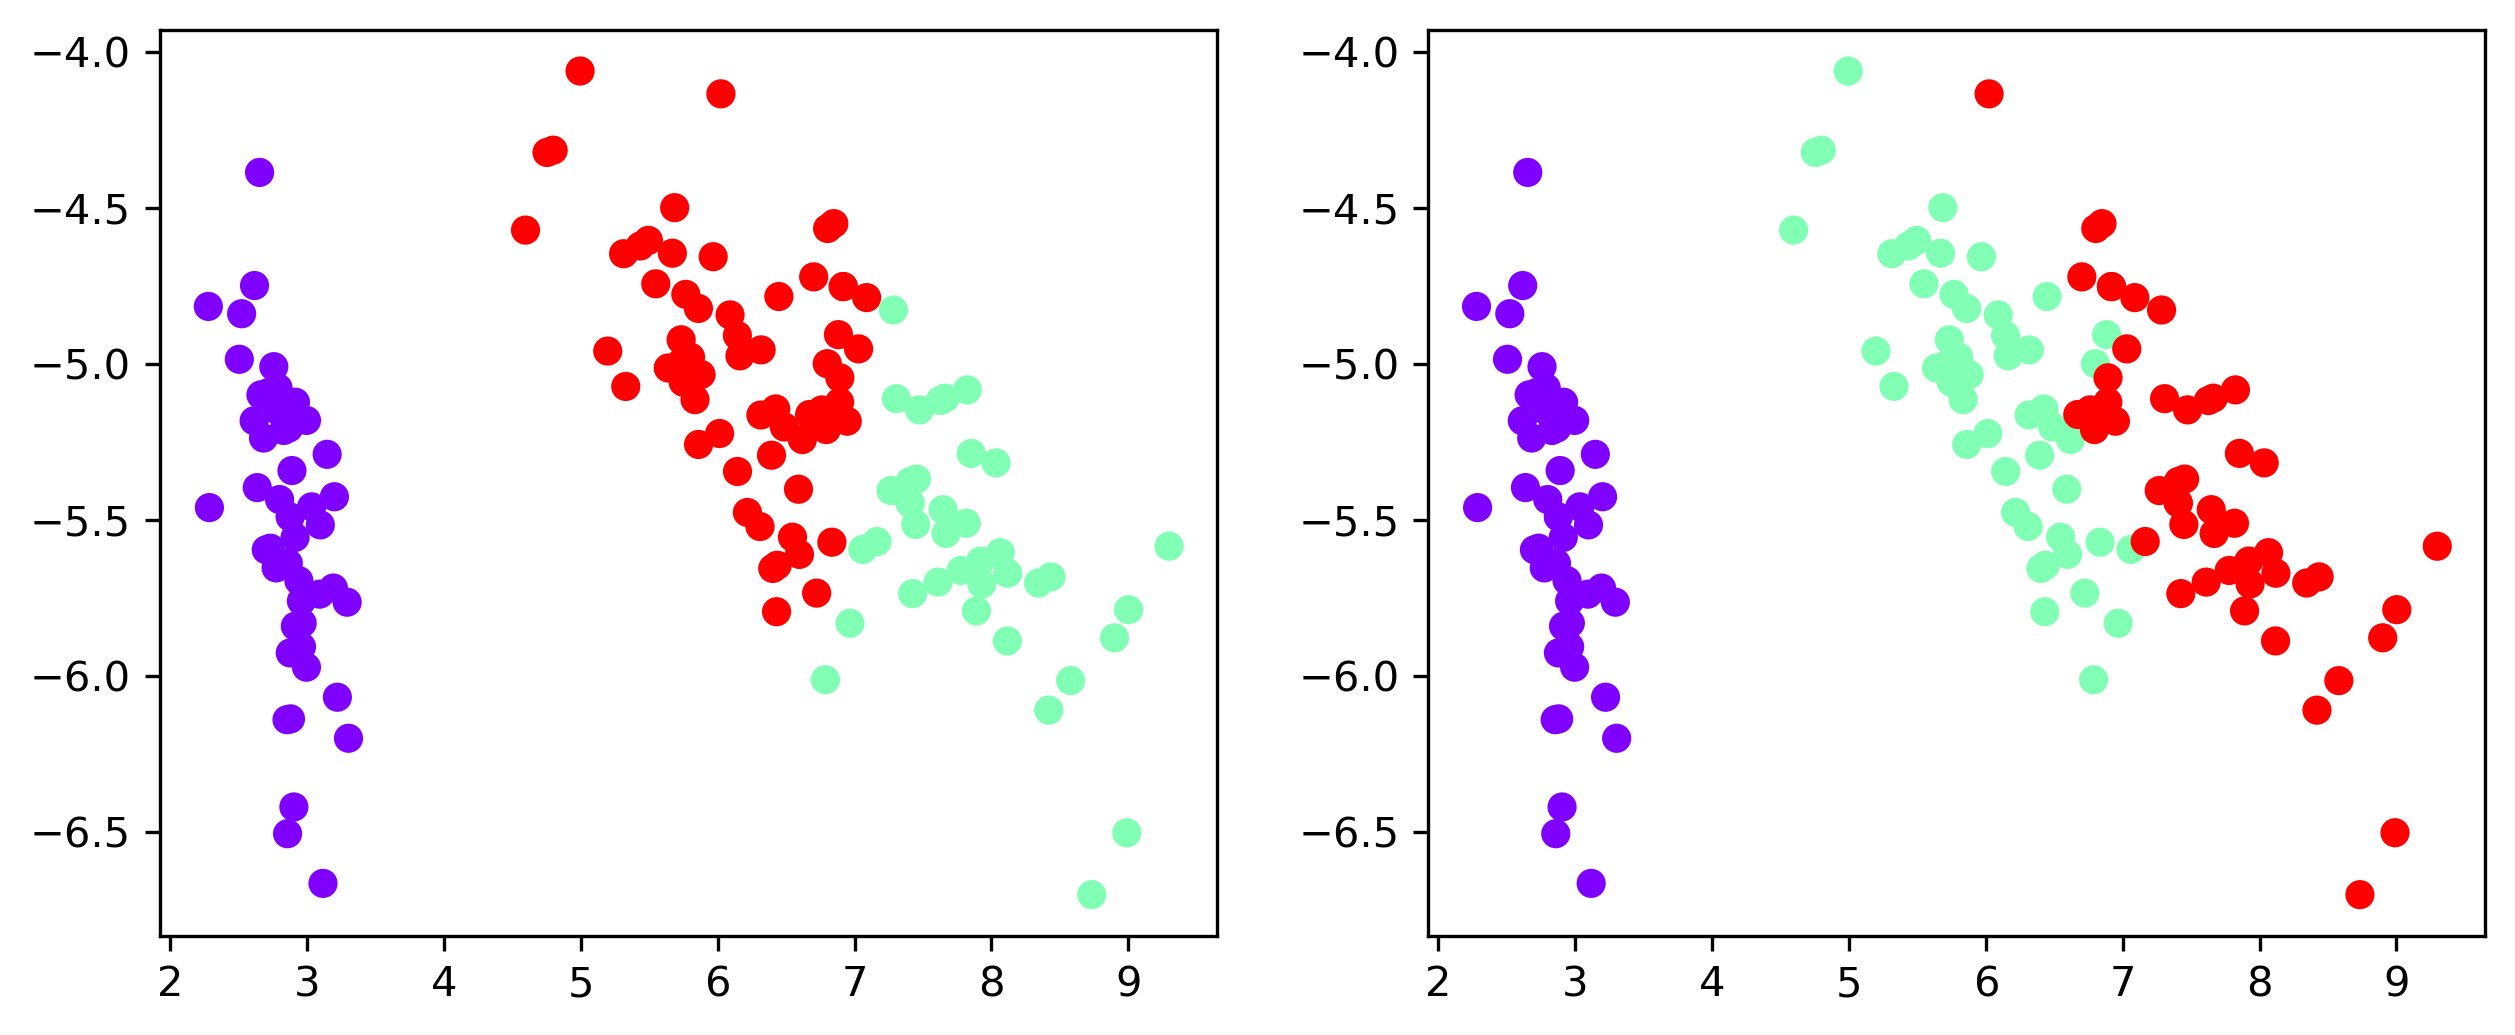

In [16]:
fig = plt.figure(figsize = (10, 4), dpi = 300)
ax = fig.add_subplot(121)
plt.scatter(X_new[:, 0], X_new[:, 1],
            c = k_means.labels_, marker = 'o',
            cmap = 'rainbow')
ax = fig.add_subplot(122)
plt.scatter(X_new[:, 0], X_new[:, 1],
            c = y, marker = 'o', cmap = 'rainbow')

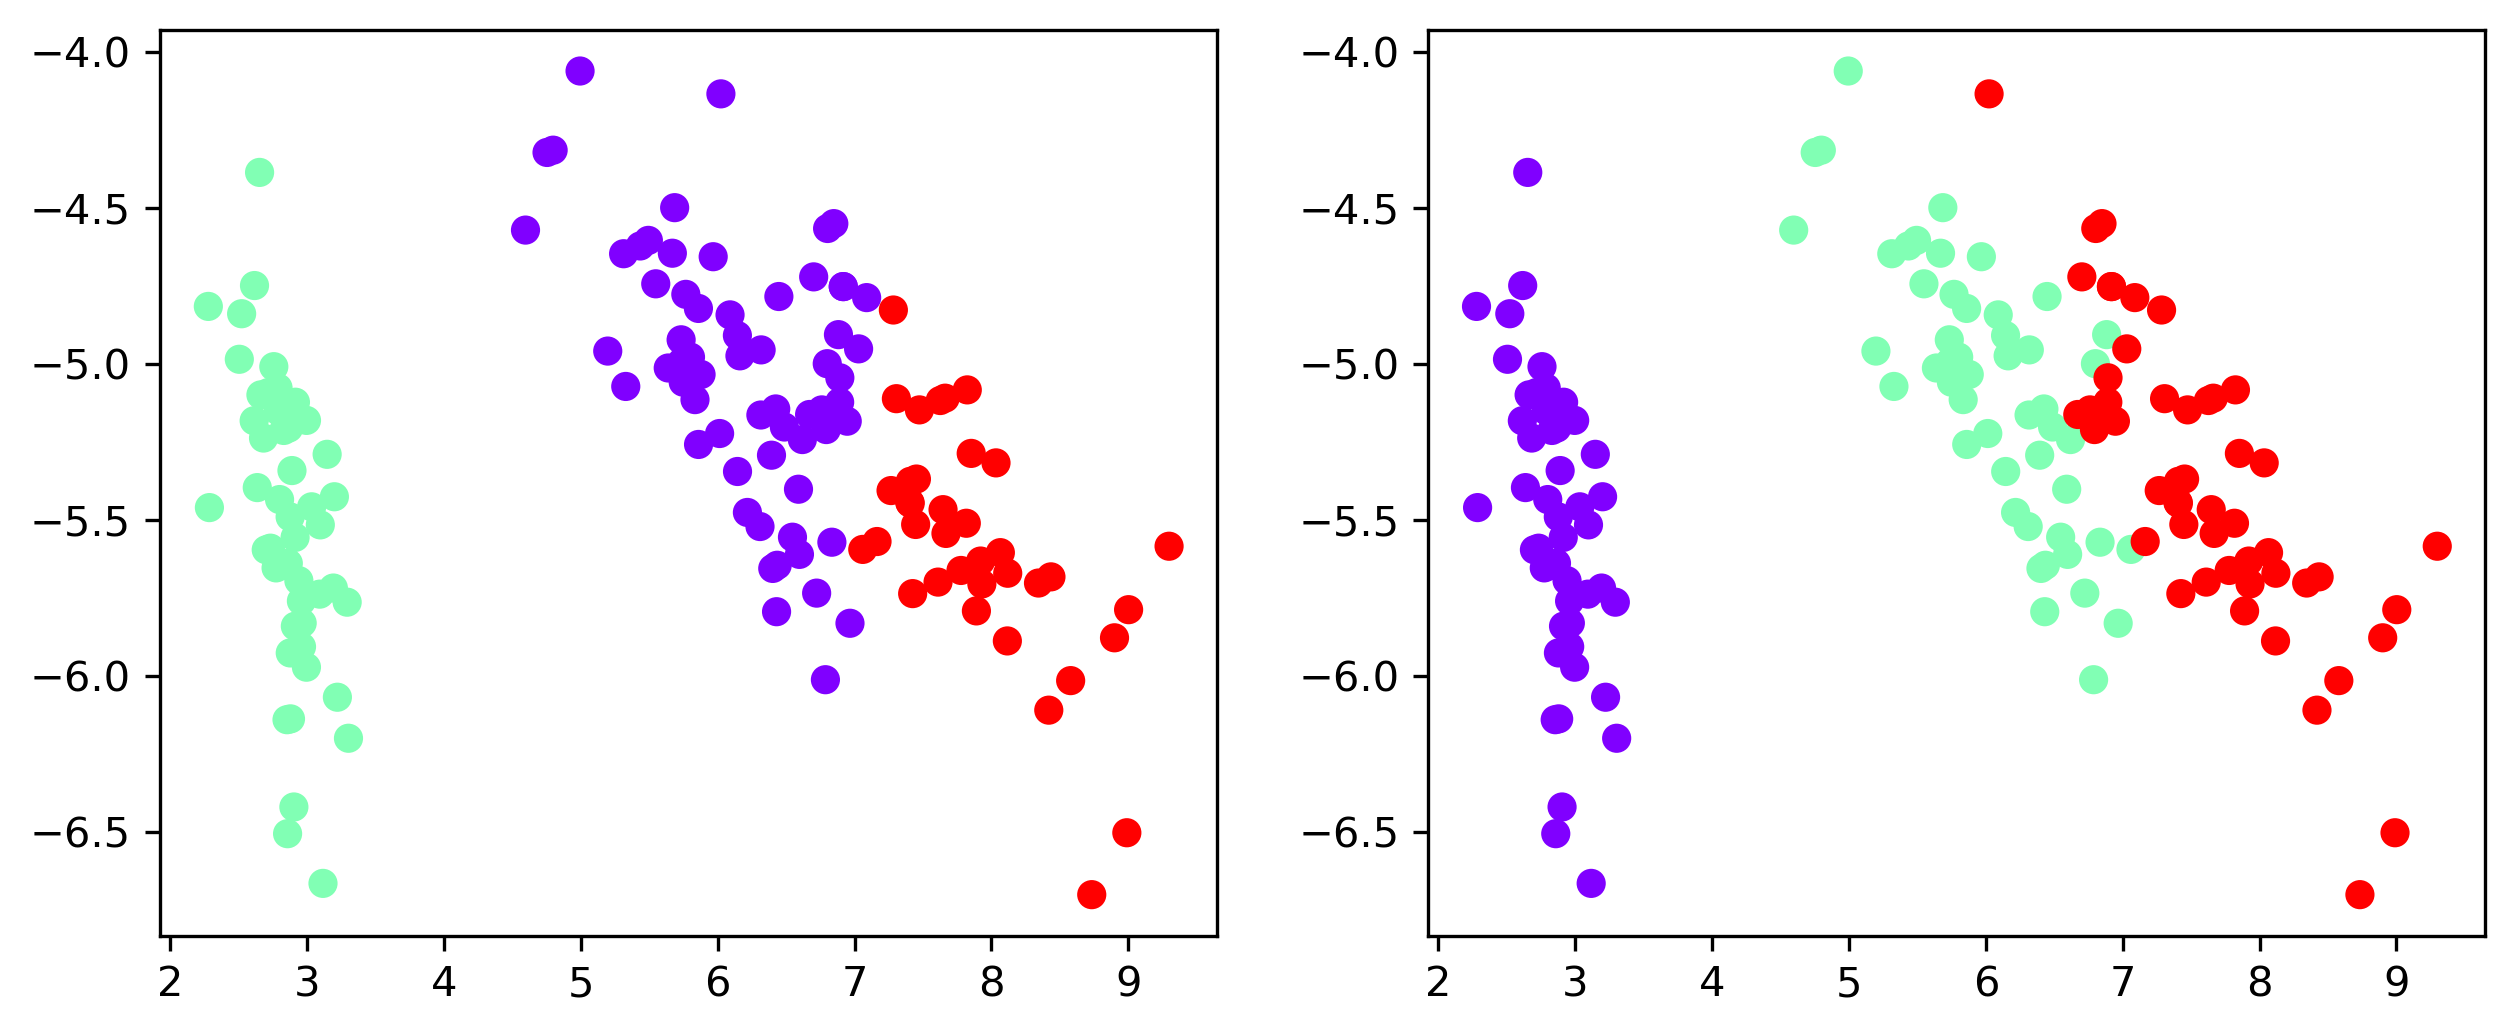

In [17]:
# Иерархическая кластеризация
ag_clustering = AgglomerativeClustering(
    n_clusters = 3, linkage = 'ward').fit(X_new)
fig = plt.figure(figsize = (10, 4), dpi = 300)
ax = fig.add_subplot(121)
plt.scatter(X_new[:, 0], X_new[:, 1],
            c = ag_clustering.labels_, marker = 'o',
            cmap = 'rainbow')
ax = fig.add_subplot(122)
plt.scatter(X_new[:, 0], X_new[:, 1],
            c = y, marker = 'o', cmap = 'rainbow')

In [18]:
# Понижение размерности с помощью t-SNE
from sklearn.manifold import TSNE
# Исходные данные размерности 3
X = np.array([[0.0, 0.0, 0.0],
             [0.0, 1.0, 1.0],
             [1.0, 0.0, 1.0],
             [1.0, 1.0, 1.0]])

In [21]:
# Понижаем размерность до 2
x_embedded = TSNE(n_components = 2,
                  init = 'random').fit_transform(X)
x_embedded

ValueError: perplexity must be less than n_samples